# Project Statistical Analysis

## Environment

In [100]:
###### DATAFRAME ###### 
import pandas as pd
import numpy as np

###### STATISTICS ###### 
import scipy.stats as stats

###### VISUALIZATION ###### 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Initial Datasets

I will be using 2 datasets:<br>
    **- Big Mac Index** "The Economist":
    https://github.com/TheEconomist/big-mac-data<br>
    **- Economic data from countries** "Data World Bank":
    https://datacatalog.worldbank.org/dataset/world-development-indicators

### Big Mac Index (The Economist)

In [2]:
bm_data = pd.read_csv('data/big-mac-full-index.csv')

In [3]:
bm_data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.004,0.050,-0.167,-0.099,1.091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.386,-0.352,-0.486,-0.444,0.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.343,-0.308,-0.451,-0.406,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.228,-0.186,-0.354,-0.301,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.383,0.458,0.156,0.251,1.903,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 19 columns):
date             1274 non-null object
iso_a3           1274 non-null object
currency_code    1274 non-null object
name             1274 non-null object
local_price      1274 non-null float64
dollar_ex        1274 non-null float64
dollar_price     1274 non-null float64
USD_raw          1274 non-null float64
EUR_raw          1274 non-null float64
GBP_raw          1274 non-null float64
JPY_raw          1274 non-null float64
CNY_raw          1274 non-null float64
GDP_dollar       628 non-null float64
adj_price        628 non-null float64
USD_adjusted     628 non-null float64
EUR_adjusted     628 non-null float64
GBP_adjusted     628 non-null float64
JPY_adjusted     628 non-null float64
CNY_adjusted     628 non-null float64
dtypes: float64(15), object(4)
memory usage: 189.2+ KB


In [5]:
bm_data.shape

(1274, 19)

### Economic Data (World Bank)

In [6]:
#This file is more than 200Mb and to a public forked repo
#we can only upload up to 100Mb. So I've included the file 
#in the gitignore of the local repo.
#I can send you the file by mail or slack 
eco_data = pd.read_csv('data/WDI_csv/WDIData.csv')

In [7]:
eco_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.007620,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.466653,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN


In [8]:
eco_data.shape

(422136, 64)

In [9]:
 eco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422136 entries, 0 to 422135
Data columns (total 64 columns):
Country Name      422136 non-null object
Country Code      422136 non-null object
Indicator Name    422136 non-null object
Indicator Code    422136 non-null object
1960              38262 non-null float64
1961              41977 non-null float64
1962              44156 non-null float64
1963              44036 non-null float64
1964              44564 non-null float64
1965              47250 non-null float64
1966              46847 non-null float64
1967              48579 non-null float64
1968              48158 non-null float64
1969              49961 non-null float64
1970              92948 non-null float64
1971              99195 non-null float64
1972              101947 non-null float64
1973              101557 non-null float64
1974              102931 non-null float64
1975              107030 non-null float64
1976              109122 non-null float64
1977              11263

### Year Selection

**2016** is the nearest year with more than 200k non null data

In [10]:
nonnulls = eco_data.shape[0] - eco_data.isnull().sum()
nonnulls.loc[nonnulls > 200000]

Country Name      422136
Country Code      422136
Indicator Name    422136
Indicator Code    422136
2000              204197
2003              200236
2004              205695
2005              219480
2006              217486
2007              221433
2008              220464
2009              221482
2010              236962
2011              227654
2012              229276
2013              224822
2014              230038
2015              224078
2016              215692
dtype: int64

## Cleaning Datasets

### Big Mac index 2016 Selection

In [11]:
bm_2016 = bm_data.loc[bm_data['date'].str.contains('2016')]

In [12]:
bm_2016.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
891,2016-01-01,ARE,AED,UAE,13.00,3.673100,3.539245,-0.282,-0.115,-0.162,0.135,0.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,2016-01-01,ARG,ARS,Argentina,33.00,13.809250,2.389703,-0.515,-0.402,-0.434,-0.234,-0.110,12735.196,2.744474,-0.247,-0.186,-0.185,0.006,-0.171
893,2016-01-01,AUS,AUD,Australia,5.30,1.415729,3.743655,-0.241,-0.064,-0.113,0.200,0.395,61066.154,4.509511,-0.282,-0.224,-0.223,-0.041,-0.209
894,2016-01-01,BRA,BRL,Brazil,13.50,4.024800,3.354204,-0.320,-0.161,-0.206,0.076,0.250,11572.700,2.702020,0.074,0.161,0.161,0.434,0.182
895,2016-01-01,CAN,CAD,Canada,5.84,1.409200,4.144195,-0.159,0.036,-0.018,0.329,0.544,50304.025,4.116480,-0.129,-0.058,-0.058,0.163,-0.041


In [13]:
bm_2016 = bm_2016[['date','iso_a3','currency_code','name','local_price','dollar_ex','dollar_price']]

In [14]:
bm_2016.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
891,2016-01-01,ARE,AED,UAE,13.00,3.673100,3.539245
892,2016-01-01,ARG,ARS,Argentina,33.00,13.809250,2.389703
893,2016-01-01,AUS,AUD,Australia,5.30,1.415729,3.743655
894,2016-01-01,BRA,BRL,Brazil,13.50,4.024800,3.354204
895,2016-01-01,CAN,CAD,Canada,5.84,1.409200,4.144195


In [15]:
len(bm_2016.iso_a3.unique())

43

In [16]:
bm_2016.shape

(86, 7)

In [17]:
bm_2016.date.unique()

array(['2016-01-01', '2016-07-01'], dtype=object)

We have the Big Mac Index data of 2016 for 43 countries, 2 rows per country. We will select only oine value: 1/1/2016

In [18]:
bm_2016 = bm_2016.loc[bm_2016['date'] == '2016-01-01'].sort_values(by='iso_a3').reset_index()

In [19]:
bm_2016 = bm_2016.drop(columns='index')

In [20]:
bm_2016.shape

(43, 7)

In [21]:
bm_2016.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
0,2016-01-01,ARE,AED,UAE,13.00,3.673100,3.539245
1,2016-01-01,ARG,ARS,Argentina,33.00,13.809250,2.389703
2,2016-01-01,AUS,AUD,Australia,5.30,1.415729,3.743655
3,2016-01-01,BRA,BRL,Brazil,13.50,4.024800,3.354204
4,2016-01-01,CAN,CAD,Canada,5.84,1.409200,4.144195


In [22]:
bm_2016.tail()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
38,2016-01-01,UKR,UAH,Ukraine,36.00,23.35000,1.541756
39,2016-01-01,URY,UYU,Uruguay,113.00,30.18500,3.743581
40,2016-01-01,USA,USD,United States,4.93,1.00000,4.930000
41,2016-01-01,VNM,VND,Vietnam,60000.00,22467.50000,2.670524
42,2016-01-01,ZAF,ZAR,South Africa,28.00,15.81375,1.770611


In [23]:
countries = list(bm_2016.iso_a3.unique())

In [24]:
countries

['ARE',
 'ARG',
 'AUS',
 'BRA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'COL',
 'CRI',
 'CZE',
 'DNK',
 'EGY',
 'EUZ',
 'GBR',
 'HKG',
 'HUN',
 'IDN',
 'IND',
 'ISR',
 'JPN',
 'KOR',
 'LKA',
 'MEX',
 'MYS',
 'NOR',
 'NZL',
 'PAK',
 'PER',
 'PHL',
 'POL',
 'RUS',
 'SAU',
 'SGP',
 'SWE',
 'THA',
 'TUR',
 'TWN',
 'UKR',
 'URY',
 'USA',
 'VNM',
 'ZAF']

**note:** the Euro Area has a unique price for the Big Mac

### Economic data 2016 Selection

I will make a pivot table with the 2016 indicators as columns, the 2016 values as cells and a column with the country code.

In [25]:
eco_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [26]:
eco_2016 = eco_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2016']]

In [27]:
eco_2016.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2016
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,84.510171
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,89.678685
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,79.665635


In [28]:
eco_2016.shape

(422136, 5)

In [29]:
eco_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422136 entries, 0 to 422135
Data columns (total 5 columns):
Country Name      422136 non-null object
Country Code      422136 non-null object
Indicator Name    422136 non-null object
Indicator Code    422136 non-null object
2016              215692 non-null float64
dtypes: float64(1), object(4)
memory usage: 16.1+ MB


In [30]:
eco_2016_pivot = pd.pivot_table(eco_2016, values=['2016'], 
index=['Country Code'], columns='Indicator Code',).reset_index()

In [31]:
eco_2016_pivot.shape

(263, 1419)

In [32]:
eco_2016_pivot.head()

Country Code              2016                                \
Indicator Code              AG.CON.FERT.PT.ZS AG.CON.FERT.ZS AG.LND.AGRI.K2   
0                       ABW               NaN            NaN      20.000000   
1                       AFG        590.067055      12.182300  379100.000000   
2                       AGO               NaN       7.982743  591900.000000   
3                       ALB               NaN     126.138483   11816.999512   
4                       AND               NaN            NaN     187.800007   

                                                                               \
Indicator Code AG.LND.AGRI.ZS AG.LND.ARBL.HA AG.LND.ARBL.HA.PC AG.LND.ARBL.ZS   
0                   11.111111   2.000000e+03          0.019071      11.111111   
1                   58.067580   7.729000e+06          0.218437      11.838679   
2                   47.477340   4.900000e+06          0.169888       3.930376   
3                   43.127735   6.203000e+05          0.215674      22.638686   
4                   39.957448   7.800000e+02          0.010091       1.659574   

                                              ...                          \
Indicator Code AG.LND.CREL.HA AG.LND.CROP.ZS  ... per_sa_allsa.cov_q4_tot   
0                         NaN            NaN  ...                     NaN   
1                   2793133.0       0.277242  ...                     NaN   
2                   2595356.0       0.232614  ...                     NaN   
3                    148084.0       3.036496  ...                     NaN   
4                         NaN            NaN  ...                     NaN   

                                                                 \
Indicator Code per_sa_allsa.cov_q5_tot per_si_allsi.adq_pop_tot   
0                                  NaN                      NaN   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   

                                                                 \
Indicator Code per_si_allsi.ben_q1_tot per_si_allsi.cov_pop_tot   
0                                  NaN                      NaN   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   

                                                                \
Indicator Code per_si_allsi.cov_q1_tot per_si_allsi.cov_q2_tot   
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   

                                                                \
Indicator Code per_si_allsi.cov_q3_tot per_si_allsi.cov_q4_tot   
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   

                                        
Indicator Code per_si_allsi.cov_q5_tot  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  

[5 rows x 1419 columns]

In [33]:
eco_2016_stack = eco_2016_pivot.iloc[:,1:].stack(level=0)

In [34]:
countries_eco = list(eco_2016_pivot['Country Code'])

In [35]:
eco_2016_stack['Country Code'] = countries_eco

In [36]:
eco_2016_stack.head()

,Indicator Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,...,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot,Country Code
0,2016,NaN,NaN,20.000000,11.111111,2.000000e+03,0.019071,11.111111,NaN,NaN,4.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW
1,2016,590.067055,12.182300,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,2793133.0,0.277242,13500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
2,2016,NaN,7.982743,591900.000000,47.477340,4.900000e+06,0.169888,3.930376,2595356.0,0.232614,577311.992188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGO
3,2016,NaN,126.138483,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,148084.0,3.036496,7705.399780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
4,2016,NaN,NaN,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,NaN,160.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND


In [37]:
cols = list(eco_2016_stack.columns)
cols = [cols[-1]] + cols[:-1]
eco_2016_stack = eco_2016_stack[cols]
eco_2016_stack.head()

,Indicator Code,Country Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,2016,ABW,NaN,NaN,20.000000,11.111111,2.000000e+03,0.019071,11.111111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,AFG,590.067055,12.182300,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,2793133.0,0.277242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,AGO,NaN,7.982743,591900.000000,47.477340,4.900000e+06,0.169888,3.930376,2595356.0,0.232614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,ALB,NaN,126.138483,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,148084.0,3.036496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,AND,NaN,NaN,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
eco_2016_stack.index = eco_2016_stack.index.droplevel(level=1)

In [39]:
eco_2016_stack.head()

Indicator Code,Country Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,ABW,NaN,NaN,20.000000,11.111111,2.000000e+03,0.019071,11.111111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,590.067055,12.182300,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,2793133.0,0.277242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,NaN,7.982743,591900.000000,47.477340,4.900000e+06,0.169888,3.930376,2595356.0,0.232614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,NaN,126.138483,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,148084.0,3.036496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,NaN,NaN,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As I have lost the deffinition of each indicator, I'll create a indicators definitions dataset

In [91]:
indicators = eco_2016[['Indicator Code','Indicator Name']].sort_values(by='Indicator Code')
indicators = indicators.drop_duplicates('Indicator Code', keep='first').reset_index()
indicators = indicators.drop('index', axis=1)

In [92]:
indicators.head()

,Indicator Code,Indicator Name
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...
3,AG.LND.AGRI.K2,Agricultural land (sq. km)
4,AG.LND.AGRI.ZS,Agricultural land (% of land area)


In [93]:
indicators.shape

(1599, 2)

### Economic data for the selected countries

As we have the EuroZone with a unique price for the index, and Germany had the bigger nominal GDP in the European union I will use Germanies data for the project as Eurozone.

![European nominal GDP 2016](img/GDP-2016.png)

In [40]:
countries.remove('EUZ')

In [41]:
countries.append('DEU')

In [42]:
countries.sort()

In [43]:
len(countries)

43

Add Germany with the EUZ data in the Big Mac Dataframe

In [44]:
bm_2016.loc[43] = ['2016-01-01', 'DEU', 'EUR', 'Germany','3.72','0.930233','3.999']

In [45]:
bm_2016.loc[bm_2016['iso_a3'] == 'DEU']

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
43,2016-01-01,DEU,EUR,Germany,3.72,0.930233,3.999


In [46]:
eco_2016_sel = eco_2016_stack[eco_2016_stack['Country Code'].isin(countries)].reset_index()

In [47]:
eco_2016_sel = eco_2016_sel.drop('index', axis=1)

In [48]:
eco_2016_sel.shape

(42, 1419)

One of the countries from the index do not have any data. 

In [49]:
countries2 = eco_2016_sel['Country Code']

In [50]:
set(countries) - set(countries2)

{'TWN'}

The country is Taiwan. We will keep the economic info of the 42 countries shared in the 2 datasets.

In [51]:
eco_2016_sel.head()

Indicator Code,Country Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,ARE,NaN,NaN,3.888000e+03,5.474514,44500.0,0.004754,0.626584,220.0,0.553365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,256.637644,50.336331,1.487000e+06,54.335712,39200000.0,0.899281,14.323873,11751239.0,0.365405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,222.056363,68.103696,3.710780e+06,48.241944,46048000.0,1.903525,5.986464,16976037.0,0.042902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BRA,534.957021,186.096115,2.835460e+06,33.924533,80976000.0,0.392776,9.688280,20122672.0,0.786060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAN,25.355774,87.625097,6.267100e+05,6.891838,43766000.0,1.212036,4.812883,14135169.0,0.510694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
eco_2016_sel.shape

(42, 1419)

### Delete columns with a lot of Null Values

In [95]:
eco_2016sel = eco_2016_sel.copy() #Cortafuegos por si el drop sale mal

In [54]:
drop = []
for column in eco_2016sel.columns:
    if eco_2016sel[column].isnull().sum() > 0:
        drop.append(column)
eco_2016sel = eco_2016sel.drop(drop, axis=1)

In [55]:
eco_2016sel.shape

(42, 374)

In [56]:
eco_2016sel.head()

Indicator Code,Country Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS
0,ARE,3.888000e+03,5.474514,44500.0,0.004754,0.626584,0.553365,71020.0,82.98,102.28,...,2.375410,0.381583,12.302400,13.957401,4.492884,8.265437,1.890900e+11,591.932275,4.291749e+08,2.321466
1,ARG,1.487000e+06,54.335712,39200000.0,0.899281,14.323873,0.365405,2736690.0,145.49,129.11,...,2.113893,25.219591,7.549287,5.327471,2.253463,1.311318,5.764237e+10,219.729699,1.300926e+09,8.792815
2,AUS,3.710780e+06,48.241944,46048000.0,1.903525,5.986464,0.042902,7692020.0,107.12,105.58,...,0.478380,0.841853,0.395994,4.273753,0.842697,3.745587,1.912870e+11,301.373567,4.572081e+09,14.781559
3,BRA,2.835460e+06,33.924533,80976000.0,0.392776,9.688280,0.786060,8358140.0,142.65,136.50,...,2.499997,8.572292,4.022812,2.431292,2.068790,1.139149,1.845580e+11,336.157598,9.775328e+09,13.448706
4,CAN,6.267100e+05,6.891838,43766000.0,1.212036,4.812883,0.510694,9093510.0,141.12,117.66,...,0.506996,2.522181,0.351569,1.175072,0.444995,0.017488,3.896630e+11,141.100079,2.397418e+10,12.934714


Nos quedan 374 indicadores para comparar con el Big Mac index.

### Merge Datasets

Big Mac index DataSet

In [57]:
bm_2016.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price
0,2016-01-01,ARE,AED,UAE,13,3.6731,3.53924
1,2016-01-01,ARG,ARS,Argentina,33,13.8093,2.3897
2,2016-01-01,AUS,AUD,Australia,5.3,1.41573,3.74366
3,2016-01-01,BRA,BRL,Brazil,13.5,4.0248,3.3542
4,2016-01-01,CAN,CAD,Canada,5.84,1.4092,4.1442


Economic Data from countries dataset

In [58]:
eco_2016sel.head()

Indicator Code,Country Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS
0,ARE,3.888000e+03,5.474514,44500.0,0.004754,0.626584,0.553365,71020.0,82.98,102.28,...,2.375410,0.381583,12.302400,13.957401,4.492884,8.265437,1.890900e+11,591.932275,4.291749e+08,2.321466
1,ARG,1.487000e+06,54.335712,39200000.0,0.899281,14.323873,0.365405,2736690.0,145.49,129.11,...,2.113893,25.219591,7.549287,5.327471,2.253463,1.311318,5.764237e+10,219.729699,1.300926e+09,8.792815
2,AUS,3.710780e+06,48.241944,46048000.0,1.903525,5.986464,0.042902,7692020.0,107.12,105.58,...,0.478380,0.841853,0.395994,4.273753,0.842697,3.745587,1.912870e+11,301.373567,4.572081e+09,14.781559
3,BRA,2.835460e+06,33.924533,80976000.0,0.392776,9.688280,0.786060,8358140.0,142.65,136.50,...,2.499997,8.572292,4.022812,2.431292,2.068790,1.139149,1.845580e+11,336.157598,9.775328e+09,13.448706
4,CAN,6.267100e+05,6.891838,43766000.0,1.212036,4.812883,0.510694,9093510.0,141.12,117.66,...,0.506996,2.522181,0.351569,1.175072,0.444995,0.017488,3.896630e+11,141.100079,2.397418e+10,12.934714


In [59]:
eco_2016sel.rename(columns={'Country Code':'iso_a3'}, inplace=True)

In [60]:
eco_2016sel.head()

Indicator Code,iso_a3,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS
0,ARE,3.888000e+03,5.474514,44500.0,0.004754,0.626584,0.553365,71020.0,82.98,102.28,...,2.375410,0.381583,12.302400,13.957401,4.492884,8.265437,1.890900e+11,591.932275,4.291749e+08,2.321466
1,ARG,1.487000e+06,54.335712,39200000.0,0.899281,14.323873,0.365405,2736690.0,145.49,129.11,...,2.113893,25.219591,7.549287,5.327471,2.253463,1.311318,5.764237e+10,219.729699,1.300926e+09,8.792815
2,AUS,3.710780e+06,48.241944,46048000.0,1.903525,5.986464,0.042902,7692020.0,107.12,105.58,...,0.478380,0.841853,0.395994,4.273753,0.842697,3.745587,1.912870e+11,301.373567,4.572081e+09,14.781559
3,BRA,2.835460e+06,33.924533,80976000.0,0.392776,9.688280,0.786060,8358140.0,142.65,136.50,...,2.499997,8.572292,4.022812,2.431292,2.068790,1.139149,1.845580e+11,336.157598,9.775328e+09,13.448706
4,CAN,6.267100e+05,6.891838,43766000.0,1.212036,4.812883,0.510694,9093510.0,141.12,117.66,...,0.506996,2.522181,0.351569,1.175072,0.444995,0.017488,3.896630e+11,141.100079,2.397418e+10,12.934714


In [61]:
data = pd.merge(bm_2016, eco_2016sel, how ='inner', on ='iso_a3')

In [150]:
#Some of the values in collar_price are not float type
data['dollar_price'] = data['dollar_price'].apply(lambda x: float(x))

In [177]:
data['region'] = ['MidleEast','LatinAmerica','Oceania','LatinAmerica',
 'NortAmerica','Europe','LatinAmerica','Asia','LatinAmerica',
 'LatinAmerica','Europe','Europe','Africa','Europe','Asia',
 'Europe','Asia','Asia','MidleEast','Asia','Asia','Asia',
 'LatinAmerica','Asia','Europe','Oceania','MidleEast',
 'LatinAmerica','Asia','Europe','Europe','MidleEast',
 'Asia','Europe','Asia','MidleEast','Europe','LatinAmerica',
 'NortAmerica','Asia','Africa','Europe']


In [178]:
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,...,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS,region
0,2016-01-01,ARE,AED,UAE,13,3.6731,3.539245,3.888000e+03,5.474514,44500.0,...,0.381583,12.302400,13.957401,4.492884,8.265437,1.890900e+11,591.932275,4.291749e+08,2.321466,MidleEast
1,2016-01-01,ARG,ARS,Argentina,33,13.8093,2.389703,1.487000e+06,54.335712,39200000.0,...,25.219591,7.549287,5.327471,2.253463,1.311318,5.764237e+10,219.729699,1.300926e+09,8.792815,LatinAmerica
2,2016-01-01,AUS,AUD,Australia,5.3,1.41573,3.743655,3.710780e+06,48.241944,46048000.0,...,0.841853,0.395994,4.273753,0.842697,3.745587,1.912870e+11,301.373567,4.572081e+09,14.781559,Oceania
3,2016-01-01,BRA,BRL,Brazil,13.5,4.0248,3.354204,2.835460e+06,33.924533,80976000.0,...,8.572292,4.022812,2.431292,2.068790,1.139149,1.845580e+11,336.157598,9.775328e+09,13.448706,LatinAmerica
4,2016-01-01,CAN,CAD,Canada,5.84,1.4092,4.144195,6.267100e+05,6.891838,43766000.0,...,2.522181,0.351569,1.175072,0.444995,0.017488,3.896630e+11,141.100079,2.397418e+10,12.934714,NortAmerica


In [179]:
data.shape

(42, 381)

Save the resultant dataset into data

In [180]:
data.to_csv("data/clean_data.csv")

In [211]:
data_indicators = pd.DataFrame()

In [212]:
data_indicators['Indicator Code'] = data.columns[7:-1]

In [213]:
data_indicators = pd.merge(data_indicators, indicators, how ='inner', on ='Indicator Code')

In [217]:
#list the indicators contained on the final data
for indicator in data_indicators['Indicator Name']:
    print(indicator)

Agricultural land (sq. km)
Agricultural land (% of land area)
Arable land (hectares)
Arable land (hectares per person)
Arable land (% of land area)
Permanent cropland (% of land area)
Land area (sq. km)
Crop production index (2004-2006 = 100)
Food production index (2004-2006 = 100)
Livestock production index (2004-2006 = 100)
Surface area (sq. km)
Foreign direct investment, net outflows (BoP, current US$)
Foreign direct investment, net outflows (% of GDP)
Foreign direct investment, net inflows (BoP, current US$)
Foreign direct investment, net inflows (% of GDP)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Access to electricity (% of population)
Population density (people per sq. km of land area)
Population in largest city
Population in the largest city (% of urban population)
Pump price for gasoline (US$ per liter)
Aquaculture production (metric tons)
Capture fisheries production (metric tons)
Total fisheries production (metr

## Statistical analysis

In [181]:
df = data.copy() #cortafuegos con los datos limpios

### Visualization of the Big Mac Index data

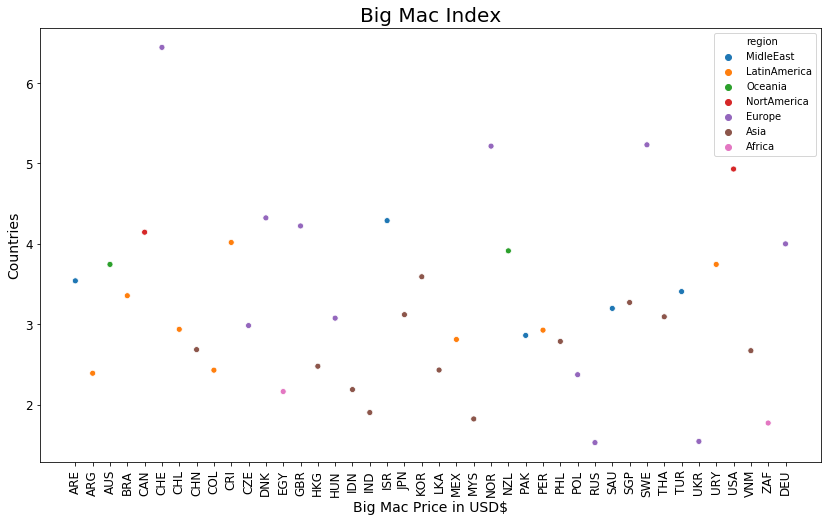

In [185]:
#Scatter plot of the Big Mac index per country
plt.figure(figsize = (14,8))
sns.scatterplot(x=df['iso_a3'], y=df['dollar_price'], hue=df['region'])
plt.xlabel('Big Mac Price in USD$', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.ylabel('Countries', fontsize=14)
plt.title('Big Mac Index', fontsize=20)
plt.show()

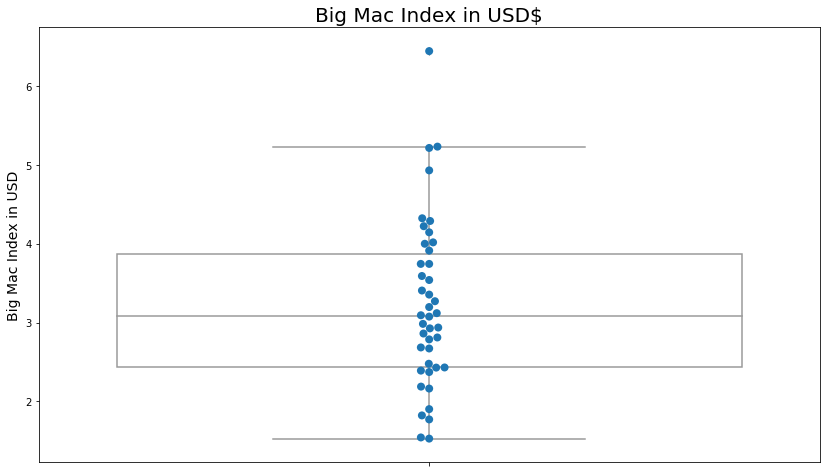

In [200]:
#Box plot of the Big Mac index per region
plt.figure(figsize = (14,8))
sns.boxplot(y='dollar_price', data=df, color='white')
sns.swarmplot(y='dollar_price', data=df, size=8)
plt.ylabel('Big Mac Index in USD', fontsize=14)
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()

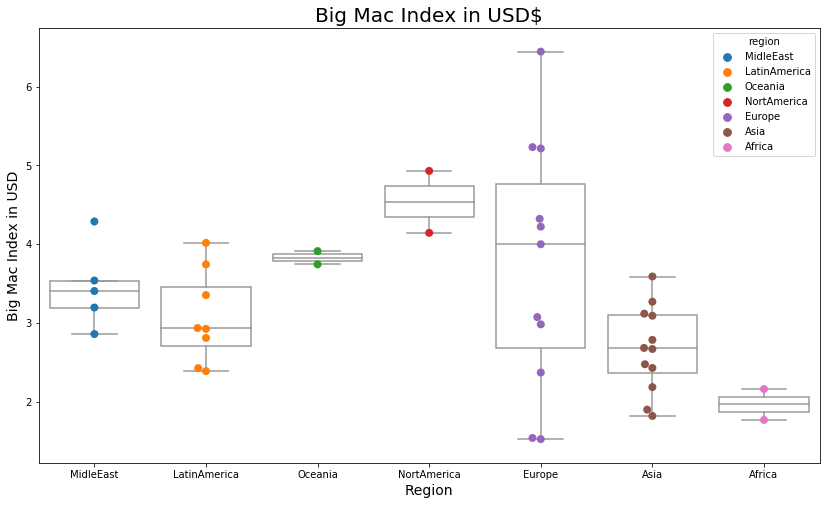

In [199]:
#Box plot of the Big Mac index per region
plt.figure(figsize = (14,8))
sns.boxplot(y='dollar_price', x = 'region', data=df, color='white')
sns.swarmplot(y='dollar_price',x = 'region', data=df, hue='region', size=8)
plt.ylabel('Big Mac Index in USD', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()


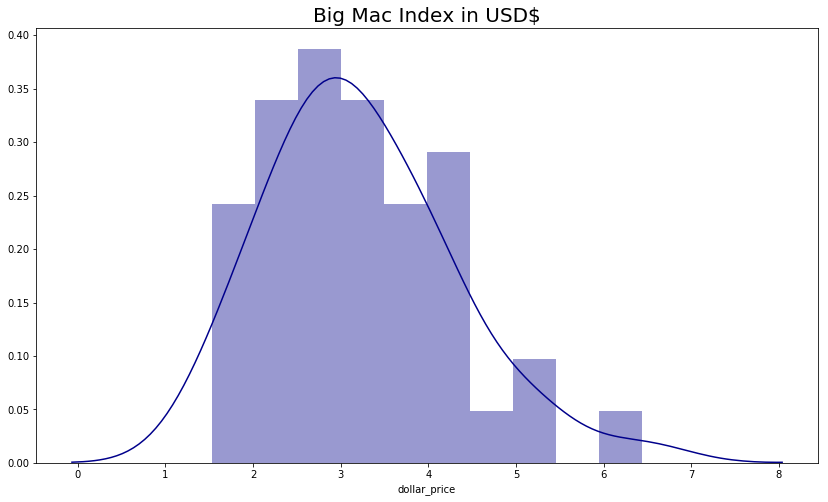

In [184]:
#Histogram of the Big Mac index
plt.figure(figsize = (14,8))
sns.distplot(df['dollar_price'], bins=10, color='darkblue')
plt.title('Big Mac Index in USD$', fontsize=20)
plt.show()

We have a series of prices per country distributed between 1.5 ans 6.5 USD. With a very wide distribution, mainly in europe.

### Correlation matrix

In [218]:
corr = df.corr()

In [219]:
corr

,dollar_price,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS
dollar_price,1.000000,-0.074865,-0.150044,-0.163793,0.018708,-0.154206,-0.317063,-0.109161,-0.428126,-0.433964,...,-0.331110,0.076653,-0.226751,-0.261588,-0.276941,0.005885,0.143889,-0.232414,0.084027,0.189603
AG.LND.AGRI.K2,-0.074865,1.000000,0.247293,0.804974,0.422817,-0.078035,-0.191317,0.781731,0.251663,0.282042,...,-0.011808,0.170146,0.017784,0.090040,0.104410,-0.096883,0.609124,0.172697,0.534185,-0.026445
AG.LND.AGRI.ZS,-0.150044,0.247293,1.000000,0.141683,0.175319,0.529432,-0.019781,-0.066321,0.113342,0.196911,...,0.194824,0.145741,0.076394,0.053685,0.329004,0.164645,0.036740,0.063613,0.049222,-0.174507
AG.LND.ARBL.HA,-0.163793,0.804974,0.141683,1.000000,0.315469,0.183279,-0.131562,0.785772,0.428827,0.431664,...,0.177004,0.146305,0.092357,0.053886,0.086124,-0.172274,0.509858,0.175879,0.372653,-0.069630
AG.LND.ARBL.HA.PC,0.018708,0.422817,0.175319,0.315469,1.000000,0.077981,-0.262224,0.557469,0.318029,0.108355,...,0.237621,0.119838,0.072906,-0.124132,-0.072331,0.107027,-0.049016,-0.136966,-0.149449,-0.161945
AG.LND.ARBL.ZS,-0.154206,-0.078035,0.529432,0.183279,0.077981,1.000000,0.034964,-0.171768,0.143218,0.155676,...,0.491038,-0.216370,0.163608,-0.035139,0.017946,-0.202589,0.003869,0.154272,-0.009635,-0.108367
AG.LND.CROP.ZS,-0.317063,-0.191317,-0.019781,-0.131562,-0.262224,0.034964,1.000000,-0.202687,0.091746,0.256709,...,-0.125150,-0.115767,-0.067876,0.134142,-0.083413,-0.145841,-0.159926,0.095320,-0.049711,0.429103
AG.LND.TOTL.K2,-0.109161,0.781731,-0.066321,0.785772,0.557469,-0.171768,-0.202687,1.000000,0.382562,0.326147,...,0.186064,0.090457,0.016174,-0.044181,-0.024349,-0.134455,0.407762,0.031708,0.284441,-0.060663
AG.PRD.CROP.XD,-0.428126,0.251663,0.113342,0.428827,0.318029,0.143218,0.091746,0.382562,1.000000,0.801261,...,0.418144,0.298234,0.241462,-0.051875,-0.095778,0.029952,-0.042063,0.163172,0.015586,-0.121809
AG.PRD.FOOD.XD,-0.433964,0.282042,0.196911,0.431664,0.108355,0.155676,0.256709,0.326147,0.801261,1.000000,...,0.352228,0.174862,0.356115,0.184337,0.064136,-0.073669,-0.046076,0.245016,0.042392,-0.155940
